<a href="https://colab.research.google.com/github/kssvrk/notebooks/blob/master/Image_processing_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Satellite Image processing workshop - Part 1**
*Speaker: Radha Krishna* ,
*Linkedin:https://www.linkedin.com/in/iamkrishradha/*

---

This workshop is about image processing and applying it on satellite imagery. Part 1 will focus on basics of image processing and Part 2 will focus on applying the concepts on satellite imagery. This workshop will help students learn concepts related to images, acquisition of images, different types of images and their formats and satellite image processing.

## **Introudction to Image processing , the concepts and libraries!** 

We will be learning image processing using python , and the features provided in google colab. This is just for convinence of environment setup and remote learning. You can do image processing in almost any language you can think of. 

In this session we will be using Opencv library to handle images , image related operations , analyse the images and do little bit of filters.

More info about [Colab](https://colab.research.google.com/notebooks/welcome.ipynb)

More info about [OpenCV](https://colab.research.google.com/notebooks/welcome.ipynb)


---

### ***What are images?***

Images are 2D/3D matrices, representing information spatially. Grayscale images ( the black and white ones ) are usually visualised as 2D matrices ( *but you can make grayscale out of colors too!* ) and color images are visualised as 3D matrices.

Images are stored in different formats. If you are into programming just think about how they can be stored. 2D matrices can be stored element by element into a file with a meta data about rows and coloumns in certain bytes, so that who ever is reading them can first read the rows and columns information and then parse the payload with that information. There are many number of ways to do the packaging of images other than the above mentioned way. More over different types of images require different type of meta data associated with them to make the images meaningful. Some images may also have inbuilt compression built into them.

### ***Format of Images***:-

Because there are many ways to package the image information, there are many different formats in which images are stored. Depending on the use case , the domain of the images , the intended recepients the packaging will be different. Some of the famous formats are



1.   JPEG
2.   TIFF ( Tagged Image file format )
3.   PNG ( Portable network graphic )
4.   BITMAP
5.   NETCDF (  used mostly for climate related data )



The library opencv has inbuilt functions for handling the parsing , opening of this datasets and associated meta data. You can easily install opencv on any operating system. For the scope of this workshop , opencv is already installed on google colab environment. 

Now you know why we chose google colab :)




In [3]:
import cv2 as cv 
from skimage import io # to open images from internet
from google.colab.patches import cv2_imshow # for image display
import matplotlib.pylab as plt
import numpy as np

(533, 800, 4)


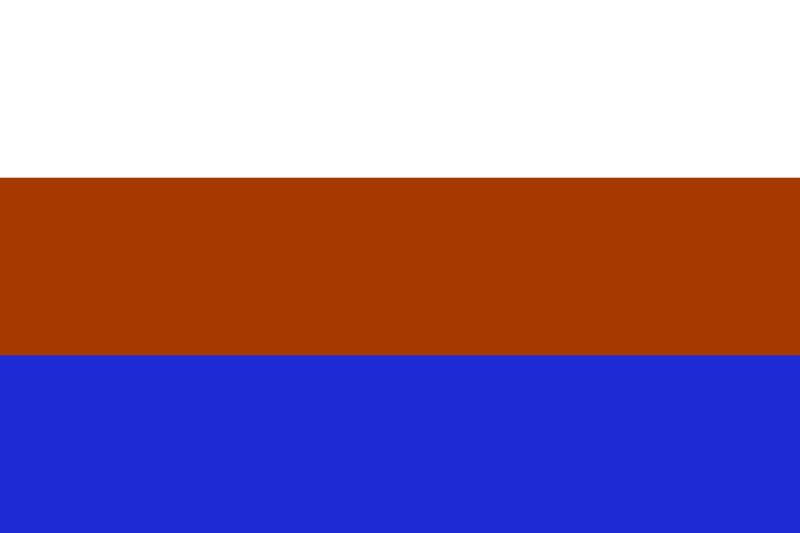

Russian Flag


In [32]:
url = 'https://upload.wikimedia.org/wikipedia/en/thumb/f/f3/Flag_of_Russia.svg/800px-Flag_of_Russia.svg.png'

image = io.imread(url) 
print(image.shape)
cv2_imshow(image)
print('Russian Flag')

In [41]:
#Check the image matrix data type (could know the bit depth of the image)
print(f" Datatype : {image.dtype}")
# Check the height of image 
print(f"Height of image : {image.shape[0]}")
# Check the width of image 
print(f" Width of image : {image.shape[1]}")
# Check the number of channels of the image
print(f" Bands in image : {image.shape[2]}")

 Datatype : uint8
Height of image : 533
 Width of image : 800
 Bands in image : 4


### Image opening , displaying , resizing , bands

In [37]:
print(f" Original Array Shape : {image.shape}")
# PNG Original order is BGR:ALPHA , but we display in RGB

modified_image=image.copy()

#image shape has bands in last , to reverse the bands we need to shift it to front
# goal make 533,800,4 to 4,533,800

modified_image=np.transpose(modified_image, axes=[2,0,1])
modified_image.shape # shape 4,533,800
print(f"Modified image shape : {modified_image.shape}")


arr = np.empty((0,533,800), int) # empty array
#band 4 , index 3 is alpha mask for pngs
arr = np.append(arr,np.expand_dims(modified_image[2],axis=0) , axis=0)
arr = np.append(arr,np.expand_dims(modified_image[1],axis=0) , axis=0)
arr = np.append(arr,np.expand_dims(modified_image[0],axis=0) , axis=0)
# now arr is of shape 3,533,800 ,so resize again to send bands to last
arr=np.transpose(arr, axes=[1,2,0])

print(f"Appended array shape : {arr.shape}")

(4, 533, 800)
(533, 800, 3)


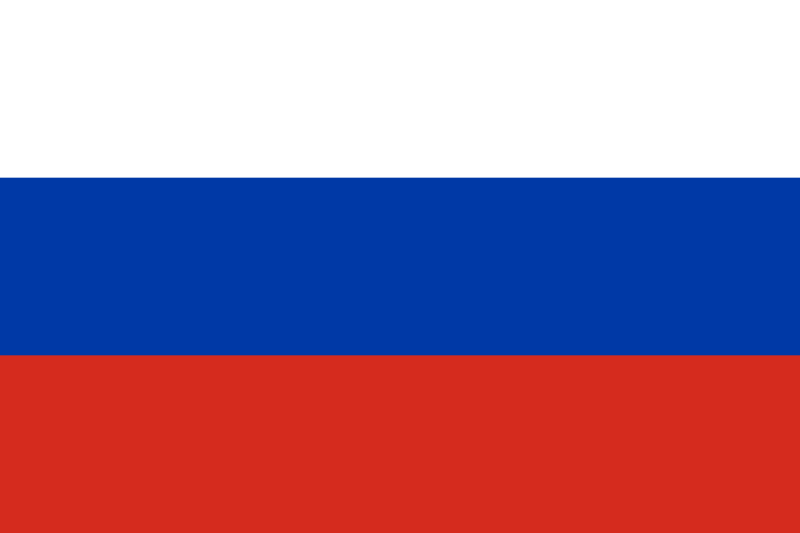

Russian Flag Reversed


In [38]:
cv2_imshow(arr)
print('Russian Flag Reversed')

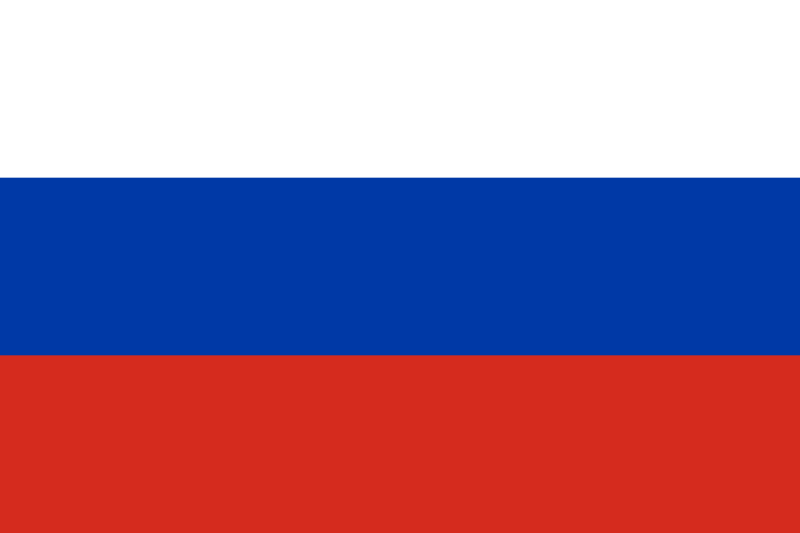

In [39]:
cv2_imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

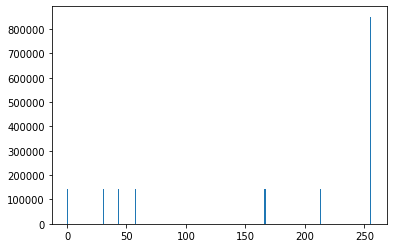

In [42]:
plt.hist(image.ravel(),bins = 256, range = [0,256]) 
plt.show()


(168, 300, 3)
Russian President


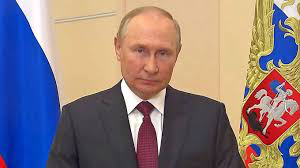

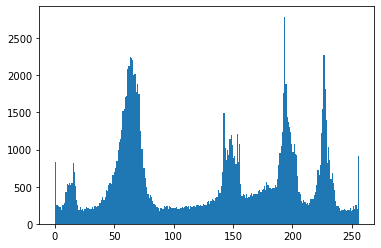

In [47]:
url2='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQNRMDea85f1zFbUnT3Kk4lydb3HS_WlLejyQ&usqp=CAU'
image2 = io.imread(url2) 
print(image2.shape)
print('Russian President')
cv2_imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB))
plt.hist(image2.ravel(),bins = 256, range = [0,256]) 
plt.show()


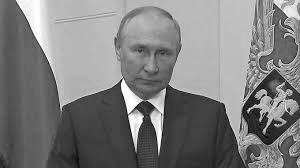

In [52]:
GrayImg = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
cv2_imshow(GrayImg)

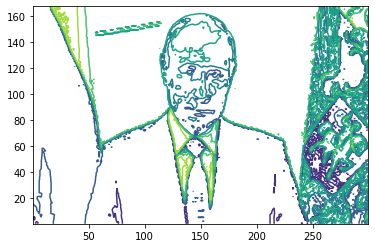

In [51]:
plt.contour(GrayImg, origin = "image")

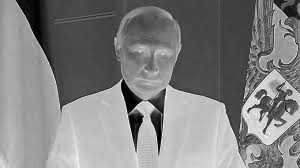

In [53]:
inverse = 255 - GrayImg
cv2_imshow(inverse)

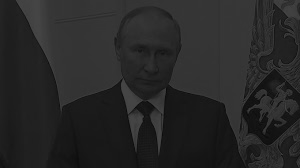

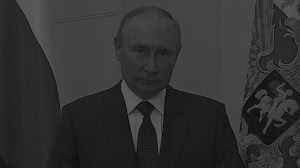

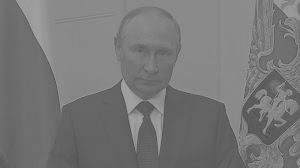

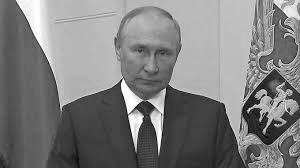

In [63]:
#brightness_contrast ,fair and lovely XD
im3 = (60.0/255)*GrayImg + 10
cv2_imshow(im3)
im4 = (80.0/255)*GrayImg + 10
cv2_imshow(im4)
im5 = (80.0/255)*GrayImg + 80
cv2_imshow(im5)
cv2_imshow(GrayImg)

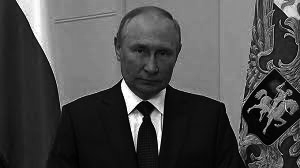

In [64]:
im6 = 255.0*(GrayImg/255.0)**2
cv2_imshow(im6)

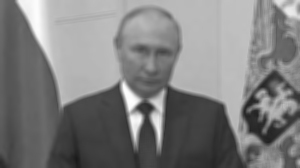

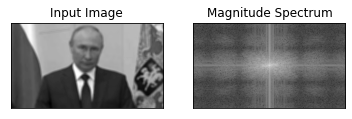

In [67]:
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(GrayImg,(5,5))
cv2_imshow(imBlur)
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


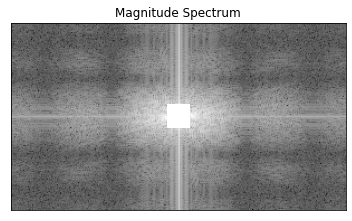

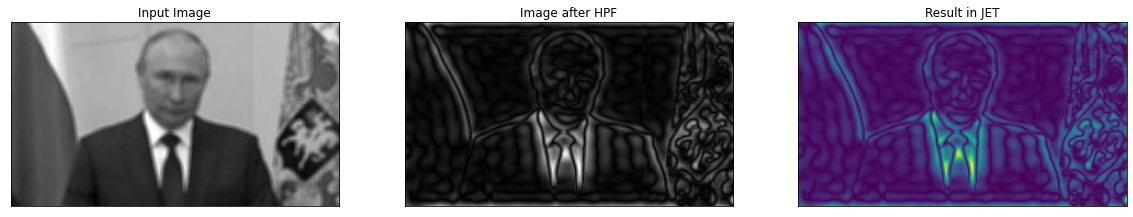

In [70]:
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
magnitude_spectrum = 30*np.log(np.abs(fshift))


plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

# Satellite Images from Bhoonidhi

Bhoonidhi is ISRO's web portal for dissemination of satellite data.
Access it from https://bhoonidhi.nrsc.gov.in

(1001, 1001, 3)
Satellite Image


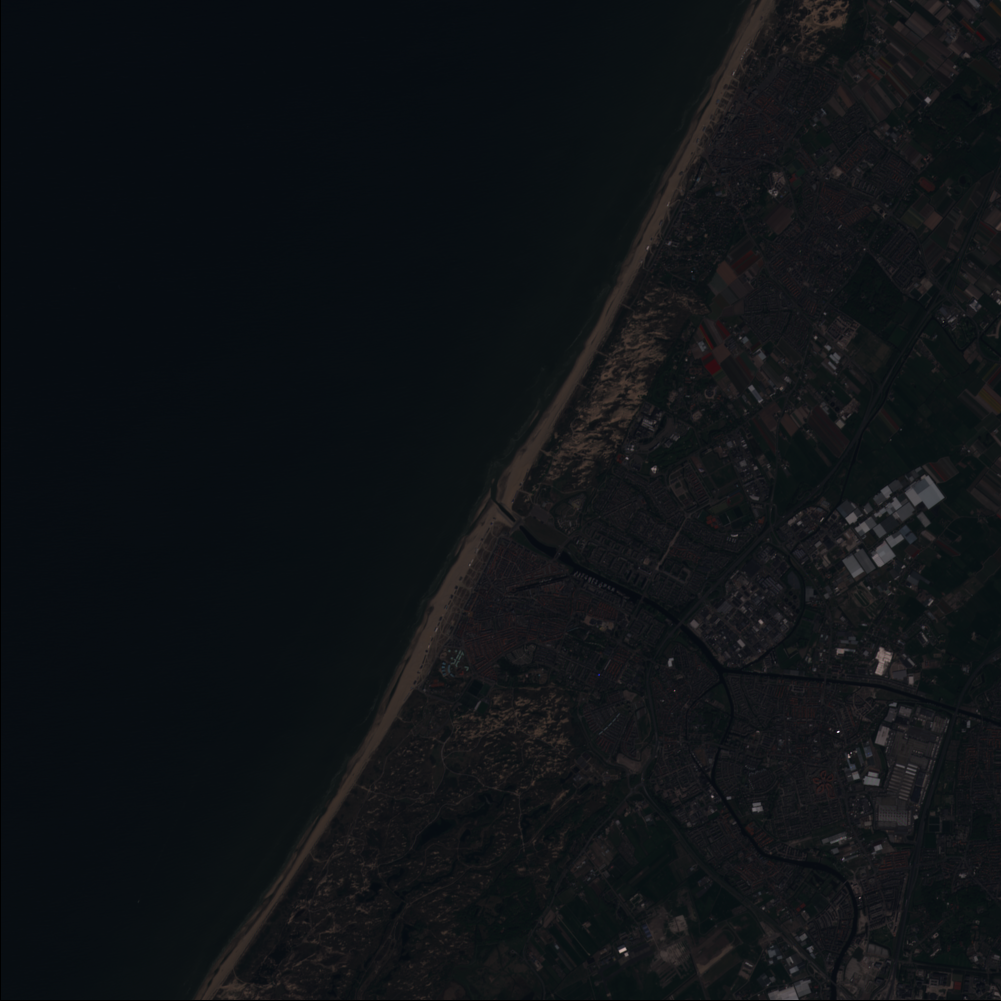

In [80]:
geo_url='https://raw.githubusercontent.com/mommermi/geotiff_sample/master/sample.tif'
gimage = io.imread(geo_url) 
gimage=(gimage-gimage.min())/(gimage.max()-gimage.min())
gimage=gimage*255
print(gimage.shape)
print('Satellite Image')
cv2_imshow(gimage)


In [121]:
#Generating WATER PIXELS
print(f" Original Array Shape : {gimage.shape}")
# PNG Original order is BGR:ALPHA , but we display in RGB

modified_gimage=gimage.copy()
modified_gimage=(modified_gimage-modified_gimage.min())/(modified_gimage.max()-modified_gimage.min())
modified_gimage=modified_gimage*255
#image shape has bands in last , to reverse the bands we need to shift it to front
# goal make 533,800,4 to 4,533,800

modified_gimage=np.transpose(modified_gimage, axes=[2,0,1])
modified_gimage.shape # shape 3,533,800
print(f"Modified image shape : {modified_gimage.shape}")



 Original Array Shape : (1001, 1001, 3)
Modified image shape : (3, 1001, 1001)


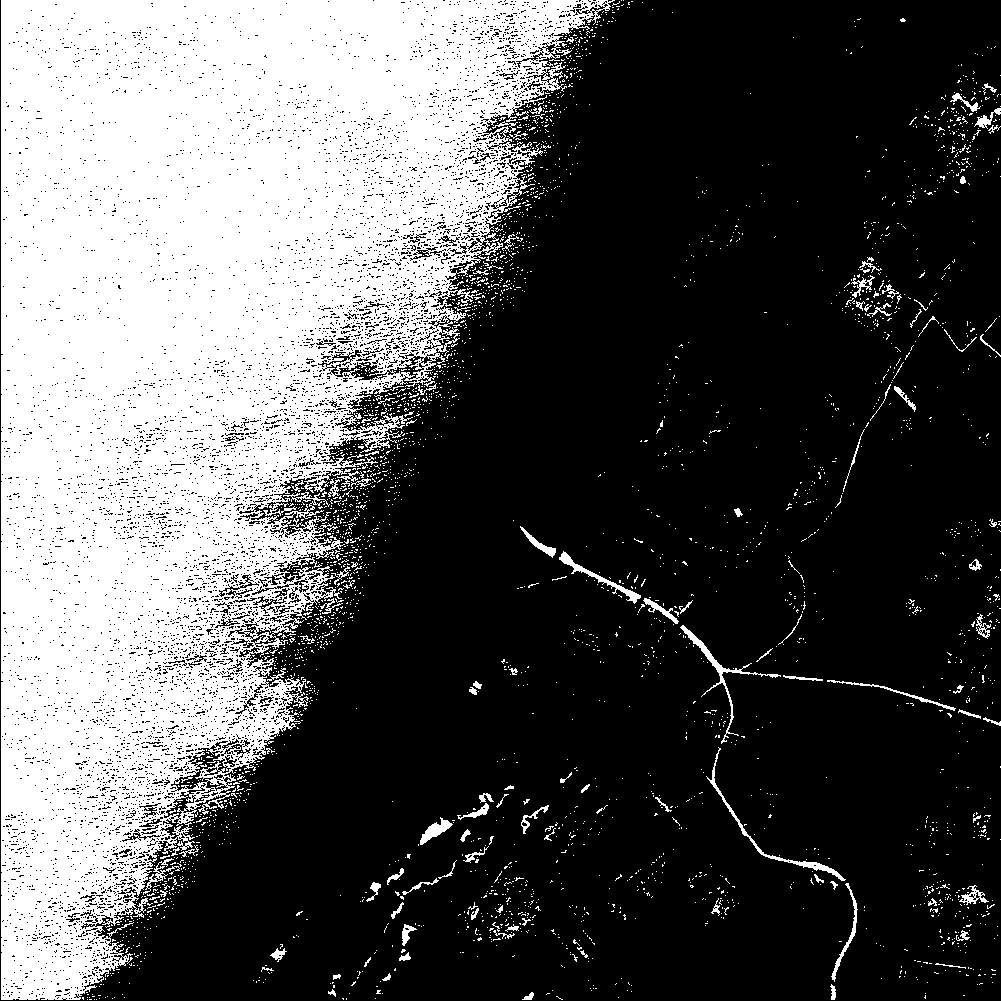

In [122]:
#band order = rgb
blue=0;red=2;green=1
for row in range(0,modified_gimage.shape[1]):
  for col in range(0,modified_gimage.shape[2]):
    
    threshold=18.5

    if(modified_gimage[blue][row][col]>threshold or modified_gimage[red][row][col]>threshold or modified_gimage[green][row][col]>threshold):
      modified_gimage[blue][row][col]=0
    
    if(modified_gimage[blue][row][col]>modified_gimage[red][row][col] and modified_gimage[blue][row][col]>modified_gimage[green][row][col]):
      modified_gimage[blue][row][col]=255
    else:
      modified_gimage[blue][row][col]=0
    

cv2_imshow(modified_gimage[blue])